In [1]:
#Intoduction and Objective
#Title: Analysis of Top Instagram Influencers & Engagement Trends

#Background: 
#Social media influencers play a significant role in digital marketing and brand promotions.
#Instagram, being one of the most popular platforms, has millions of influencers across various industries.
#Understandinf influencer engagement can help business choose the right influencers for marketing campaigns.

#Objective:
#This project aims to:- Analyzed the top Instagram influencers based on followers, engagement rates, and rights.
#Indentify trends and correlations between followers, likes and engagement.
#Cluster influencers into different groups based on engagement behavior.
#Build a predictive model to estimate an influencer’s engagement rate based on their followers and likes.
#Provide business recommendations on how brands can leverage influencer marketing effectively.


In [3]:
#Data Loading and Preprocessing

In [3]:
#Importing the Librabries
import pandas as pd                                       
import numpy as np                                        
import matplotlib.pyplot as plt                           
import seaborn as sns                                     
from sklearn.cluster import KMeans                       
from sklearn.preprocessing import StandardScaler          
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [4]:
#Load the dataset
df=pd.read_csv("top_insta_influencers_data.csv")
df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [9]:
df.describe()

,rank,influence_score
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


In [11]:
df.isnull().sum()

rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

In [13]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [15]:
print("Summary Statistics:\n",df.describe())

Summary Statistics:
              rank  influence_score
count  200.000000       200.000000
mean   100.500000        81.820000
std     57.879185         8.878159
min      1.000000        22.000000
25%     50.750000        80.000000
50%    100.500000        84.000000
75%    150.250000        86.000000
max    200.000000        93.000000


In [19]:
df.drop_duplicates()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


In [23]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=df[col].fillna(df[col].mode().iloc[0])
    else:
        df[col]=df[col].fillna(df[col].median())

In [37]:
def convert_to_int(val):
    if isinstance(val,str):
        val=val.lower().replace(',','').strip()
        if 'k' in val:
            return int(float(val.replace('k',''))*1_000)
        elif 'm' in val:
            return int(float(val.replace('m',''))*1_000_000)
        elif val.isdigit():
            return int(val)
    try:
        return int(val)
    except:
        return None        
                

In [39]:
for col in['followers','posts','total_likes']:
    df[col]=df[col].apply(convert_to_int)

In [43]:
df[['followers','posts','total_likes']]=df[['followers','posts','total_likes']].fillna(df.median(numeric_only=True)).astype('int64')

In [45]:
#summary Statistics
df[['influence_score','followers','avg_likes','60_day_eng_rate','new_post_avg_like']].describe()

,influence_score,followers
count,200.000000,2.000000e+02
mean,81.820000,7.740950e+07
std,8.878159,7.368727e+07
min,22.000000,3.280000e+07
25%,80.000000,4.000000e+07
50%,84.000000,5.005000e+07
75%,86.000000,6.890000e+07
max,93.000000,4.758000e+08


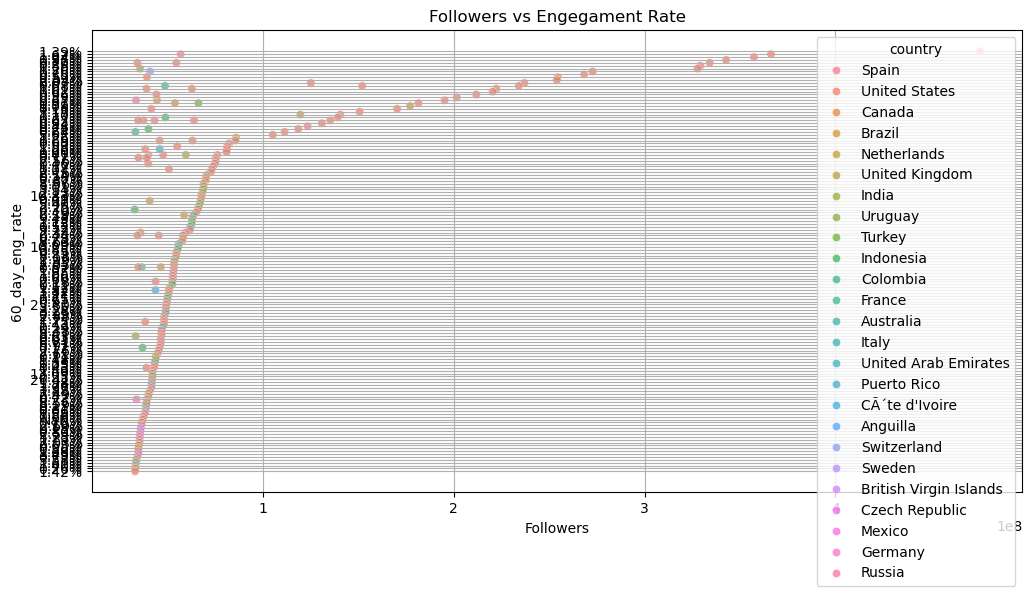

In [51]:
#Relationship: Followers VS Engegament Rate
plt.figure(figsize=(12,6))
sns.scatterplot(df,x='followers',y='60_day_eng_rate',hue='country',alpha=0.7)
plt.title("Followers vs Engegament Rate")
plt.xlabel("Followers")
plt.ylabel("60_day_eng_rate")
plt.grid(True)
plt.show()

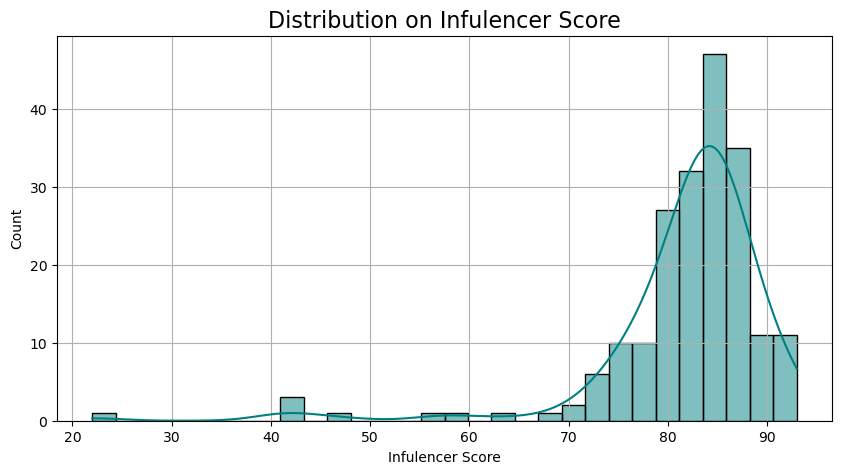

In [57]:
#Distribution of Infulencer Score
plt.figure(figsize=(10,5))
sns.histplot(df['influence_score'],bins=30,kde=True,color='teal')
plt.title("Distribution on Infulencer Score", fontsize=16)
plt.xlabel("Infulencer Score")
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_24608\3341058688.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index,y=top_countries.values,palette='viridis')


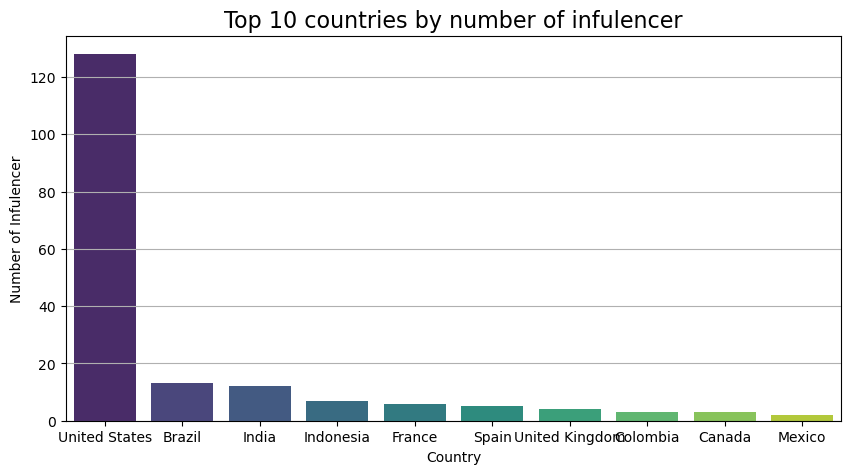

In [61]:
#Top countries by infulencer count
top_countries=df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index,y=top_countries.values,palette='viridis')
plt.title("Top 10 countries by number of infulencer", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Number of Infulencer")
plt.grid(True,axis='y')
plt.show()

In [71]:
#Feature Engineering
def convert_to_int(val):
    if isinstance(val, str):
        val = val.lower().replace(',', '').strip()
        if 'k' in val:
            return int(float(val.replace('k', '')) * 1_000)
        elif 'm' in val:
            return int(float(val.replace('m', '')) * 1_000_000)
        elif val.isdigit():
            return int(val)
    try:
        return int(float(val))  # in case it's a float string
    except:
        return None

# Apply to relevant columns
for col in ['followers', 'posts', 'total_likes', 'avg_likes', 'new_post_avg_like']:
    df[col] = df[col].apply(convert_to_int)


df[['followers', 'posts', 'total_likes', 'avg_likes', 'new_post_avg_like']] = df[[
    'followers', 'posts', 'total_likes', 'avg_likes', 'new_post_avg_like'
]].fillna(df.median(numeric_only=True)).astype(int)

df['like_follower_ratio'] = df['total_likes'] / df['followers']
df['post_follower_ratio'] = df['posts'] / df['followers']
df['avg_likes_ratio'] = df['avg_likes'] / df['followers']


In [22]:
#Predicting Influe

In [23]:
# Automatically clean all percentage columns
for col in df.columns:
    if df[col].astype(str).str.contains('%').any():
        print(f"Column with % symbol: {col}")


Column with % symbol: 60_day_eng_rate


In [24]:
print(df.columns.tolist())
df.rename(columns={'engagement rate': 'engagement_score'}, inplace=True)
df['engagement_score'] = (df['avg_likes'] / df['followers']) * 100
df['engagement_score'] = df['engagement_score'].astype(str).str.replace('%', '').astype(float)



['rank', 'channel_info', 'influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'country', 'like_follower_ratio', 'post_follower_ratio', 'avg_likes_ratio']


In [25]:
for col in df.columns:
    if df[col].astype(str).str.contains('%').any():
        df[col] = df[col].astype(str).str.replace('%', '').astype(float)

In [26]:
# Select your features
features = ['followers', 'posts', 'total_likes', 'avg_likes',
            'like_follower_ratio', 'post_follower_ratio', 'avg_likes_ratio', 'engagement_score']
target = 'influence_score'

# Drop rows with missing values in relevant columns
df = df.dropna(subset=features + [target])

# Prepare data
X = df[features]
y = df[target]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)


In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Evaluation Metrics for Linear Regression:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")  # Closer to 1 = better
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")


Evaluation Metrics for Linear Regression:
R² Score: 0.0081
Mean Absolute Error (MAE): 5.74
Mean Squared Error (MSE): 167.70


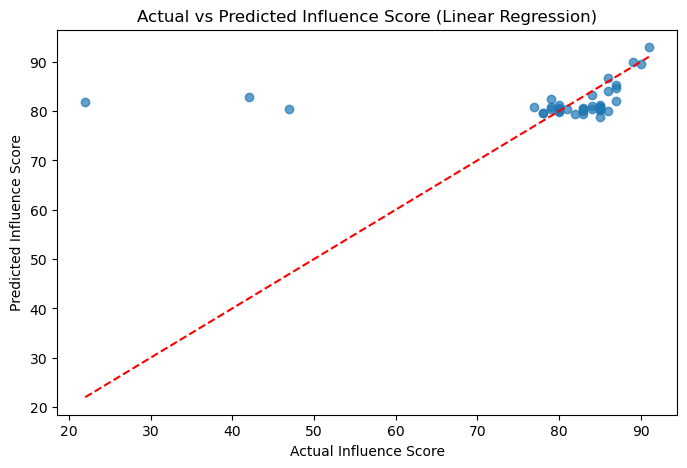

In [55]:
#Visalize the Prediction
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Diagonal line
plt.xlabel('Actual Influence Score')
plt.ylabel('Predicted Influence Score')
plt.title('Actual vs Predicted Influence Score (Linear Regression)')
plt.show()


In [68]:
#Check the lengths
print("Shapes:")
print("X_test_scaled:", X_test_scaled.shape)
print("y_test:", y_test.shape)
print("y_pred:", y_pred.shape)


Shapes:
X_test_scaled: (40, 8)
y_test: (40,)
y_pred: (40,)


In [70]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})
print(coefficients)


               Feature  Coefficient
0            followers     3.357198
1                posts     4.193873
2          total_likes     3.369233
3            avg_likes    -0.899752
4  like_follower_ratio    -2.614116
5  post_follower_ratio    -3.672478
6      avg_likes_ratio     0.237620
7     engagement_score     0.237620


In [72]:
#Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100,
random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

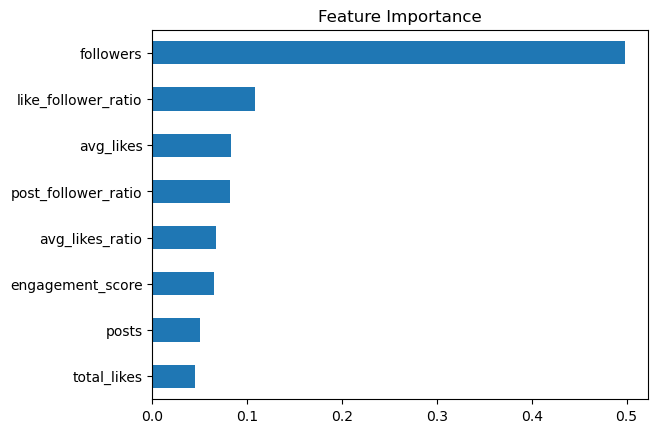

In [73]:
#Model Interpretation and Feature Importance
feature_importances = pd.Series(model.feature_importances_,
index=X.columns)
feature_importances.sort_values().plot(kind='barh',
title='Feature Importance')
plt.show()


In [ ]:
#Final Observation and Summary
#Key Influential Factors: The feature importance analysis shows which factors (like follower count, engagement rate, etc.) have the biggest impact on predicting the influence score of an influencer.

#Model Performance: Based on the R² score, we can see how well our model predicts an influencer's influence score using their follower-related data.

#Business Insights: By identifying the top influencers by country and their engagement levels, businesses can make smarter choices when partnering with influencers for marketing campaigns.